# Practical 6: Reinforcement Learning

Author: CAMERON STROUD

Student Number: n11552123

### Learning Outcomes:
- Implement the Q-learning and SARSA for Cliff Walking environment
- Compare the difference between these two algorithms

We will require the following library for this practical (Import all necessary libraries before running the codes):

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import time

import gymnasium as gym


import os
from IPython.display import clear_output

from tqdm import tqdm

## The Cliff Walking Environment

Cliff walking involves crossing a gridworld from start to goal while avoiding falling off a cliff. 

The game starts with the player at location [3, 0] of the 4x12 grid world with the goal located at [3, 11]. If the player reaches the goal the episode ends.

A cliff runs along [3, 1..10]. If the player moves to a cliff location it returns to the start location.

The player makes moves until they reach the goal.

The observation is the player’s current position. The action space consists of "left, down, right, up". Each time step incurs -1 reward, unless the player stepped into the cliff, which incurs -100 reward.

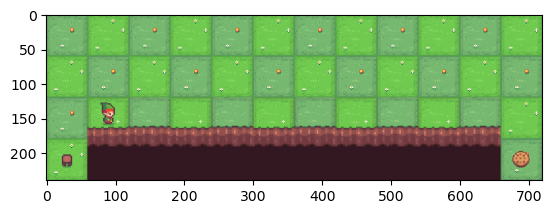

In [33]:
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)

for _ in range(20):
    action = env.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
        
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()

env.close()

## Part A: Q learning

### Q1
Observe the Cliff Walking environment, and intuitively determine the optimal path. Explain why you choose this action.

[UP, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, RIGHT, DOWN]  
-1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 - 1 = -13

Each step incurs a -1 reward so the least number of moves would be the optimal path. This would be ideally directly to the right but the cliffs incur -100, and a step upwards to skirt them (and downwards to reach the goal) is required.

### Q2
Implement Q learning algorithm to derive an optimal policy for Cliff Walking environment.

In [4]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [51]:
def render_env(episode, iteration):
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.title(f'E{episode} k{iteration}')
    plt.show()
    env.render()

In [60]:
num_episodes = 1000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 1  # Probability of exploration

In [92]:

# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# Q-learning algorithm
for episode in tqdm(range(num_episodes)):
    debug = False
    state,_ = env.reset()
    done = False
    k = 1
    
#     learning_rate = 1  # Learning rate
#     exploration_rate = 1  # Probability of exploration
    
    while not done:
        
        # Hint: choose an action based on epsilon-greedy policy and update Q-value using the Q-learning update rule
        ### START CODE HERE ###
        # Choose an action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[state, :])

        # Perform the chosen action
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Update Q-value using the Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * np.max(Q_table[next_state, :]) - Q_table[state, action])
                    
        if not (k % 1000000):
            debug = True
        state = next_state
        
        ### END CODE HERE ###
        
        k = k + 1
        learning_rate = 1 / k  # Learning rate
        exploration_rate = 1 / k  # Probability of exploration

        if terminated or truncated:
            done=True
            
        if debug:
            render_env(episode, k)
    # print(k)

env.close()

100%|██████████| 1000/1000 [00:04<00:00, 246.09it/s]


In [93]:
print(Q_table)

[[ -11.31833541  -11.14358819  -11.51547311  -11.37026119]
 [ -10.6928778   -10.4864223   -10.58106784  -10.6971632 ]
 [  -9.85225585   -9.74814646   -9.77959774   -9.89872503]
 [  -9.03396517   -8.9697179    -9.19155695   -8.99692935]
 [  -8.26524347   -8.20017441   -8.21624019   -8.41127264]
 [  -7.47502842   -7.44302142   -7.43288833   -7.46745568]
 [  -6.67394852   -6.65213792   -6.67819446   -6.71579545]
 [  -5.86441901   -5.86451646   -5.90995691   -5.89175332]
 [  -5.12099376   -5.07351056   -5.11290286   -5.06449541]
 [  -4.371027     -4.30083888   -4.29481536   -4.30271168]
 [  -3.52948363   -3.53514359   -3.53176374   -3.59962549]
 [  -2.83272367   -2.88908561   -2.83970173   -2.84843995]
 [ -11.89844676  -11.86385459  -12.18504828  -12.42506813]
 [ -11.14883282  -11.00473055  -11.15527486  -11.95498749]
 [ -10.21358769  -10.14286385  -10.20548319  -10.51299327]
 [  -9.28665516   -9.2728915    -9.32302887   -9.34232374]
 [  -8.44143489   -8.38966075   -8.40979978   -8.8086941

### Q3
Evaluate the optimal policy obtained by Q learning in Cliff Walking environment.

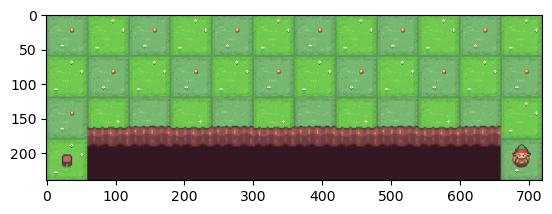

In [94]:
"""Evaluate the agent trained by Q-learning"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

path = []
action_space = ['up', 'right', 'down', 'left']
while not done:
    
    # Hint: choose the action by the Q table and transit to the next state
    ### START CODE HERE ###
    action = np.argmax(Q_table[state, :])# this is where you would insert your policy
    path.append(action_space[action])
    ### END CODE HERE ###
    state, reward, terminated, truncated, info = env.step(action)
    
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()
    
    if terminated or truncated:
        done = True

env.close()

In [95]:
print(path)

['up', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'right', 'down']


### Q4
Does the optimal policy align with your initial expectation in Q1? Provide an explanation for the observed outcome.

Yes, the optimal policy aligns with initial expectations from Q1. 
# EXPLAIN MORE

## Part B: SARSA

In [96]:
# Create an environment
env = gym.make("CliffWalking-v0")

In [97]:
num_episodes = 1000  # Number of training episodes
discount_factor = 0.99  # Discount factor
learning_rate = 1  # Learning rate
exploration_rate = 1  # Probability of exploration

In [98]:
# Establish a Q-table
num_states = env.observation_space.n
num_actions = env.action_space.n
Q_table = np.zeros((num_states, num_actions))

# SARSA algorithm
for episode in tqdm(range(num_episodes)):
    state, _ = env.reset()
    action = env.action_space.sample()
    done = False
    k = 1

    while not done:
        
        # Hint: take action and observe next state and reward, then choose the next action based on epsilon-greedy policy 
        # and update Q-table using the SARSA update rule
        ### START CODE HERE ###
        
        # Take action and observe next state and reward
        next_state, reward, terminated, truncated, _ = env.step(action)

        # Choose the next action based on epsilon-greedy policy
        if np.random.rand() < exploration_rate:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q_table[next_state, :])

        # Update Q-table using the SARSA update rule
        Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_factor * Q_table[next_state, next_action] - Q_table[state, action])

        state = next_state
        action = next_action
        ### END CODE HERE ###
        
        k = k + 1
        learning_rate = 1 / k  # Learning rate
        exploration_rate = 1 / k  # Probability of exploration

        if terminated or truncated:
            done=True
            
print(Q_table)

100%|██████████| 1000/1000 [00:07<00:00, 137.26it/s]

[[ -14.40332566  -13.4063193   -16.56091842  -14.08998589]
 [ -12.89537953  -12.27280924  -19.18490212  -14.01333557]
 [ -11.62723972  -11.33161924  -11.37982909  -12.56481145]
 [ -10.81465253  -10.46670689  -10.5125347   -11.41957094]
 [  -9.67855059   -9.4940633    -9.65404313  -10.30173151]
 [  -8.72343774   -8.60075476   -8.62178637   -8.90100795]
 [  -7.90663913   -7.67580315   -7.68688339   -7.95005422]
 [  -6.76828219   -6.75328075   -6.76227138   -7.12637126]
 [  -5.89601556   -5.83645539   -5.84830264   -5.88568952]
 [  -4.93051991   -4.90942047   -4.90954781   -5.09597972]
 [  -4.04611456   -3.99099178   -3.98981506   -4.25350498]
 [  -3.18112142   -3.18283739   -3.05493259   -3.12467218]
 [ -14.63648093  -19.32676569  -18.30627003  -15.72018412]
 [ -12.93292431  -11.6323908   -32.99325907  -15.4936578 ]
 [ -11.6135195   -10.66504753  -14.69110992  -11.83147549]
 [ -10.31212631   -9.74524089  -15.83901062  -10.89697476]
 [  -9.60173341   -8.8398377    -9.03768504   -9.1595184

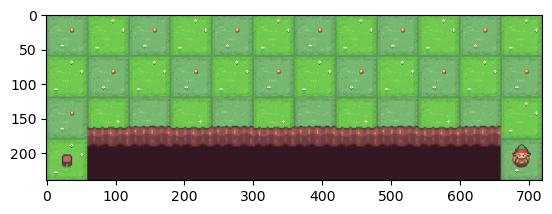

In [102]:
"""Evaluate the agent trained by Q-learning"""
os.environ["SDL_VIDEODRIVER"] = "dummy"

env = gym.make("CliffWalking-v0", render_mode="rgb_array")
env.action_space.seed(42)

state, info = env.reset(seed=42)
done = False

while not done:
    
    # Hint: choose the action by the Q table and transit to the next state
    ### START CODE HERE ###
    action = np.argmax(Q_table[state, :])# this is where you would insert your policy
    path.append(action_space[action])
    ### END CODE HERE ###
    state, reward, terminated, truncated, info = env.step(action)
    
    clear_output(wait=True)
    plt.imshow( env.render() )
    plt.show()
    env.render()
    
    if terminated or truncated:
        done = True

env.close()

### Q5
Does the optimal policy align with your intuition? Provide an explanation for the observed outcome.

< Answer Here >

### Q6
Do Q-learning and SARSA choose the same paths to the goal? If not, try to increase the number of SARSA's episodes and observe the result. Explain why.

< Answer Here >

### Q7
In the code of SARSA, the exploration probability is $1/k$ as in the lecture note. Now, use a constant exploration probability such as 0, 0.1, 0.2, ..., and observe the optimal policy. How will modifying this parameter impact the optimal path of SARSA? Explain the results.

< Answer Here >